### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

#### 1. Graphs and Graph Theory

# Lecture 2: Graphs and `networkx`

<div class="alert alert-success">
    A <b>graph</b> can serve as a mathematical model of a network.
</div>

* We will use the `networkx` package to work with examples of graphs and networks.

* This notebook gives and introduction into graph theory, along with some basic, useful
  `networkx` commands.

* From now on, we load some `python` packages at the start of each
  notebook, so we have them available later on.

In [1]:
# Loading the networkx as nx
import networkx as nx

##  The Internet, for Example

**Example.**  The internet in December 1970.  Nodes are computers,
connected by a link if they can directly communicate with each other.
At the time, only 13 computers participated in that network.

![the internet in december 1970](https://d1vq4hxutb7n2b.cloudfront.net/system/files/53b5c1/66342b8248f70002ea/h_1536/f7dec1970.jpg)


As far as the network structure is concerned, the following list of **adjacencies** contains all the information.

In [3]:
# Printing the list of adjacencies from a file
!cat data/arpa.adj

UCSB SRI UCLA
SRI UCLA STAN UTAH
UCLA STAN RAND
UTAH SDC MIT
RAND SDC BBN
MIT BBN LINC
BBN HARV
LINC CASE
HARV CARN
CASE CARN


The following **diagram**, built from the adjacenies in the list,
contains the same information, without the distracting details of the
US geography.

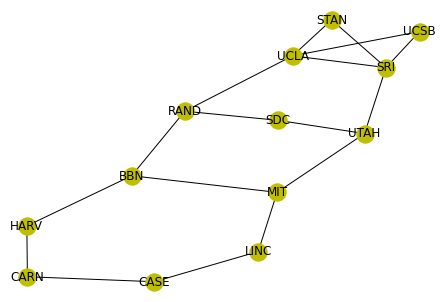

In [8]:
# Reading the graphs structure from the file
H = nx.read_adjlist("data/arpa.adj") # file should have .adj extension

# Making dictionary of options/parameters
opts = { "with_labels": True, # fow showing labels
        "node_color": 'y' } # for colours

# Drawing the graph
nx.draw(H,
        **opts) # attaching dictionary

## Simple Graphs

<div class="alert alert-danger">
    <b>Definition.</b> A (simple) <b>graph</b>
is a pair $G = (X, E)$, consisting of a (finite) set $X$ of
    objects, called <b>nodes</b> or <b>vertices</b> or <b>points</b>,
and a subset $E \subseteq \binom{X}{2}$
    of <b>links</b> or <b>edges</b>.
</div>

Usually, $n$ is used to denote the number of vertices of a graph,
$n = |X|$,
and $m$ for the number of edges, $m = |E|$.

$n = |X|$ is called the **order** of the graph $G$, and $m = |E|$ is called the  **size** of $G$.

Here, $\binom{X}{2}$, pronounced as "$X$ choose 2",
is the set of all $2$-element subsets of $X$.
(The notation is motivated by the fact that if $X$ has $n$ elements then
$\binom{X}{2}$ has $\binom{n}{2} = \frac12 n(n-1)$ elements:
$$\left|\binom{X}{2}\right| = \binom{|X|}{2}.$$
Obviously, $m \leq \binom{n}{2}$.

**Example.**
$X = \{ A, B, C, D \}$ and $E = \{ AB, BC, BD, CD \}$
(where $AB$ is short for $\{ A, B \}$).

##  Simple Graphs in `networkx`

* In `networkx`, we can construct this graph with the `Graph`
constructor function, which takes the node and edge sets $X$ and $E$ in a variety of formats.  
* Here, we use $2$-letter strings for 
the edges (which implicitly gives the nodes too): 

In [ ]:
G = nx.Graph(["AB", "BC", "BD", "CD"])

* The `python` object `G` representing the graph $G$ has lots of useful attributes.  Firstly, it has `nodes` and `edges`.

In [ ]:
G.nodes

In [ ]:
list(G.nodes)

In [ ]:
G.edges

In [ ]:
list(G.edges)

* A **loop** over a graph `G` will effectively loop over `G`'s nodes.

In [ ]:
for node in G:
    print(node)

* We can count the nodes, and the edges.

In [ ]:
G.number_of_nodes()

In [ ]:
G.order()

In [ ]:
G.number_of_edges()

In [ ]:
G.size()

* And a drawing of the graph can be produced.

In [ ]:
nx.draw(G, **opts)

* The example also illustrates a typical way how diagrams of graphs are drawn:
nodes are represented by small circles, and edges by lines connecting the nodes.

* A graph `G` can be modified, by adding nodes one at a time ...

In [ ]:
G.add_node(1)
list(G.nodes)

* ... or many nodes at once ...

In [ ]:
G.add_nodes_from([2, 3, 5])
list(G.nodes)

* ... or even as nodes of another graph `H`

In [ ]:
G.add_nodes_from(H)
print(list(G.nodes))

In [ ]:
G.order(), G.size()

* Adding edges works in a similar fashion

In [ ]:
G.add_edge(1,2)
list(G.edges)

In [ ]:
edge = (2,3)
G.add_edge(*edge)
list(G.edges)

In [ ]:
G.add_edges_from([(1,5), (2,5), (3,5)])
print(list(G.edges))

In [ ]:
G.add_edges_from(H.edges)
print(list(G.edges))

In [ ]:
nx.draw(G, **opts)

In [ ]:
G.order(), G.size()

* There are corresponding commands for removing nodes or edges from a graph `G`

In [ ]:
G.remove_edge(3,5)
G.order(), G.size()

In [ ]:
G.remove_edges_from(H.edges())

G.order(), G.size()

In [ ]:
nx.draw(G, **opts)

In [ ]:
G.remove_nodes_from(H)
nx.draw(G, **opts)

* Removing a node will silently delete all edges it forms part of

In [ ]:
G.remove_nodes_from([1, 2, 3, 5])
G.order(), G.size()

In [ ]:
nx.draw(G, **opts)

* Each node has a list of **neighbors**, the nodes it is
  directly connected to by an edge of the graph.

In [ ]:
list(G.neighbors('B'))

In [ ]:
G['B']

In [ ]:
list(G['B'])

* The number of neighbors of node $x$ is its **degree**

In [ ]:
G.degree('B')

In [ ]:
G.degree

In [ ]:
list(G.degree)

## Examples

### Complete Graphs

The [**complete graph**](https://en.wikipedia.org/wiki/Complete_graph)
on a vertex set $X$ is the graph with edge set all of $\binom{X}{2}$.

While it is somewhat straight-forward to find all $2$-element
subsets of a given set $X$ with a short `python` program,
it is probably more convenient (and possibly efficient) to use a function from the
`itertools` package for this purpose.

In [ ]:
nodes = range(5)
print(nodes)
print(list(nodes))

In [ ]:
from itertools import combinations
print(combinations(nodes, 2))
print(list(combinations(nodes, 2)))

In [ ]:
K5 = nx.Graph(combinations(nodes, 2))

In [ ]:
nx.draw(K5, **opts)

We can turn this procedure into a `python` function that
constructs the complete graph for an arbitrary vertex set $X$.

In [ ]:
def complete_graph(nodes):
    return nx.Graph(combinations(nodes, 2))

In [ ]:
nx.draw(complete_graph(range(3)), **opts)

In [ ]:
nx.draw(complete_graph(range(4)), **opts)

In [ ]:
nx.draw(complete_graph(range(5)), **opts)

In [ ]:
nx.draw(complete_graph(range(6)), **opts)

### Petersen Graph

The [Petersen Graph](https://en.wikipedia.org/wiki/Petersen_graph)
is a graph on $10$ vertices with $15$ edges.
It can be constructed 
as the complement of the line graph of the complete graph $K_5$,
i.e.,
as the graph with vertex set
$X = \binom{\{0,1,2,3,4\}}{2}$ (the edge set of $K_5$)
with an edge between $x, y \in X$ whenever $x \cap y = \emptyset$.

In [ ]:
nodes = K5.edges
print(list(combinations(nodes, 2)))

In [ ]:
edges = [e for e in combinations(nodes, 2) 
           if not set(e[0]) & set(e[1])]
len(edges)

In [ ]:
P = nx.Graph(edges)

In [ ]:
nx.draw(P, **opts)

Even though there is no parameter involved in this example,
it might be worth wrapping the construction up into a `python`
function.

In [ ]:
def petersen_graph():
    nodes = combinations(range(5), 2)
    G = nx.Graph()
    for e in combinations(nodes, 2):
        if not set(e[0]) & set(e[1]):
            G.add_edge(*e)
    return G

In [ ]:
nx.draw(petersen_graph(), **opts)

##  Code Corner

### `python`

* **dictionary unpacking** operator `**opts`: `python` function calls take **positional** arguments and **keyword** arguments.  
  The keyword arguments can be collected in a dictionary `opts` (with the keywords as keys).  
  This dictionary can then be passed into the function call in its "unwrapped" form `**opts`.

* `list` [[doc]](https://docs.python.org/3/library/stdtypes.html#list) turns its argument into a `python` list (if possible).

In [ ]:
list("networks")

* **list comprehension** [[doc]](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) allows the construction of new list from old ones
without explicit `for` loops (or `if` statements).

In [ ]:
[(x, y) for x in range(4) for y in range(4) if x < y]

### `networkx`

* the `read_adjlist` command [doc] constructs a graph from a text file in `adj` format.

* `G.nodes` [doc] returns the nodes of a graph `G` (as an iterator).

* `G.edges` [doc] returns the edges of a graph `G` (as an iterator).

### `itertools`

* `combinations` [[doc]](https://docs.python.org/3/library/itertools.html#itertools.combinations) returns the $k$-element combinations of a given list (as an iterator).

In [ ]:
print(["".join(c) for c in combinations("networks", 2)])

##  Exercises

1. Using list comprehension (and the `python` mod operator `%`)
   construct a multiplication table for integers mod $7$, i.e.,
   a $7 \times 7$ array with entry `a * b % 7` in row `a` and
   column `b`.
2. Find a way to use list comprehension for 
   listing all $2$-element subsets of $\{0, 1, 2, 3\}$
   (as above) without using an `if`-clause.
1. Write a `python` function that constructs and returns
   a [cycle graph](https://en.wikipedia.org/wiki/Cycle_graph)
   on $n$ vertices.
   
2. In the internet graph `H` from above, add the
   degree of each node as an attribute to the node.